## 3.1. 들어가며

## 3.2. 대회의 시작 (1) 참가 규칙, 평가 기준 살펴보기

## 3.3. 대회의 시작 (2) 데이터 살펴보기

## 3.4. 일단 제출하고 시작해! Baseline 모델 (1) Baseline 셋팅하기

In [1]:
import matplotlib.pyplot as plt

## 3.5. 일단 제출하고 시작해! Baseline 모델 (2) 라이브러리, 데이터 가져오기

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('얍💢')

얍💢


In [3]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

print(train_data_path)
print(sub_data_path)

/aiffel/aiffel/kaggle_kakr_housing/data/train.csv
/aiffel/aiffel/kaggle_kakr_housing/data/test.csv


## 3.6. 일단 제출하고 시작해! Baseline 모델 (3) 데이터 이해하기

In [4]:
data = pd.read_csv('03/data/train.csv')
sub = pd.read_csv('03/data/test.csv')
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6555, 20)


In [5]:
with pd.option_context('display.max_rows', 21, 'display.max_columns', None): 
    display(data)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [7]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
data['waterfront'].value_counts()

0    14928
1      107
Name: waterfront, dtype: int64

In [9]:
data['view'].value_counts()

0    13548
2      665
3      373
1      241
4      208
Name: view, dtype: int64

In [10]:
data['condition'].value_counts()

3    9793
4    3956
5    1155
2     110
1      21
Name: condition, dtype: int64

In [11]:
data['grade'].value_counts()

7     6228
8     4207
9     1855
6     1406
10     781
11     288
5      174
12      61
4       23
13       9
3        2
1        1
Name: grade, dtype: int64

In [12]:
data['yr_built'].value_counts()

2014    405
2006    325
2004    305
2005    302
2003    284
       ... 
1901     21
1933     20
1902     20
1935     19
1934     11
Name: yr_built, Length: 116, dtype: int64

In [13]:
data['yr_renovated'].value_counts()

0       14404
2014       71
2013       28
2007       25
2003       25
        ...  
1940        1
1950        1
1954        1
1948        1
1944        1
Name: yr_renovated, Length: 65, dtype: int64

In [14]:
y = data['price']
del data['price']

print(data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [15]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
print(data.shape)
print(sub.shape)

(15035, 20)
(6555, 20)


In [17]:
train_len = len(data)
data = pd.concat((data, sub), axis=0)

print(len(data))

21590


In [18]:
print(data.shape)

(21590, 20)


In [19]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


<AxesSubplot:>

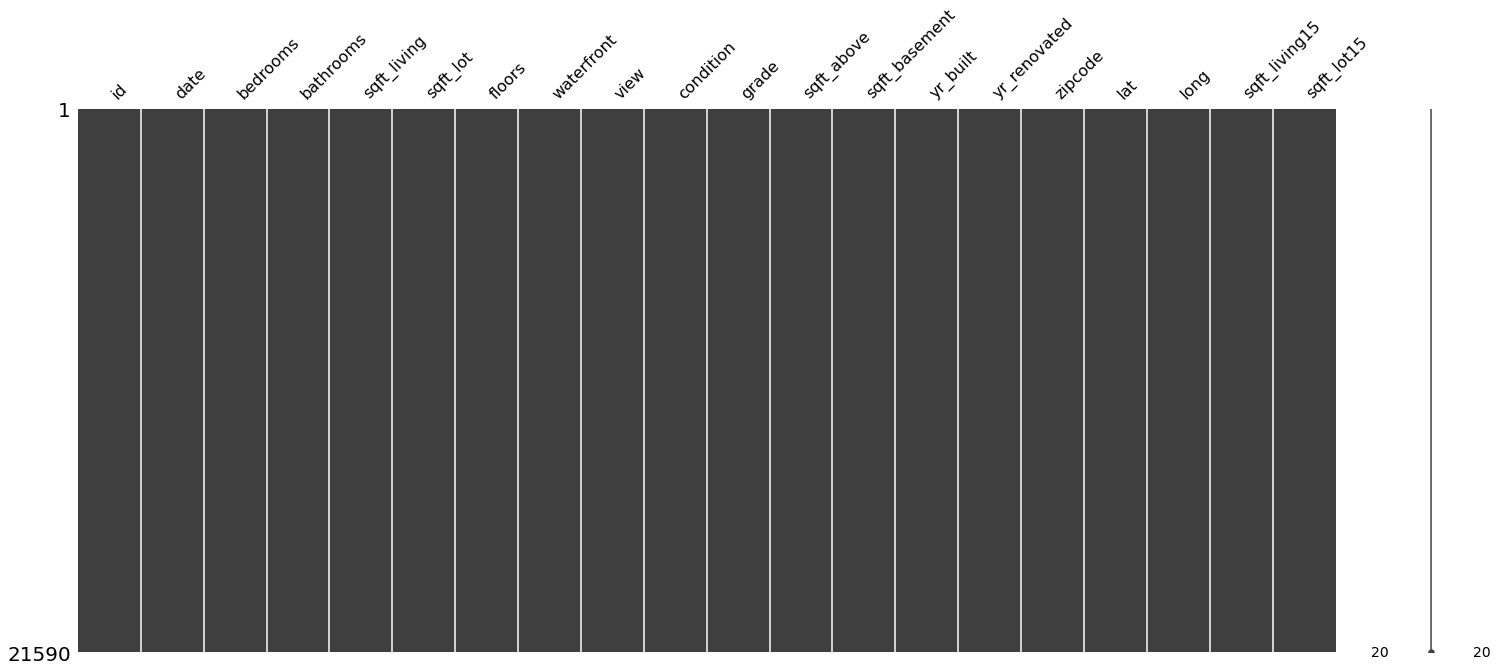

In [20]:
msno.matrix(data)

In [21]:
# 1. id 컬럼이 결측치인지 확인합니다.
null_check = pd.isnull(data['id'])
print(null_check)

0       False
1       False
2       False
3       False
4       False
        ...  
6550    False
6551    False
6552    False
6553    False
6554    False
Name: id, Length: 21590, dtype: bool


In [22]:
# 2. 결측치인 데이터만 뽑아냅니다.
null_data = data.loc[null_check, 'id']
null_data.head()

Series([], Name: id, dtype: int64)

In [23]:
print(type(data['id']))
print(type(null_check))
print(type(null_data))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [24]:
# 3. 결측치인 데이터의 개수를 셉니다.
print('{}: {}'.format('id', len(null_data.values)))

id: 0


In [25]:
# 한 번에 뿅!
print('{} : {}'.format('id', len(data.loc[pd.isnull(data['id']), 'id'].values)))

id : 0


In [26]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


In [27]:
data.to_csv('test.csv')

In [28]:
# sub_id = data['id'][train_len:]
# del data['id']

# print(data.columns)

In [29]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [32]:
len(data.columns)

20

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

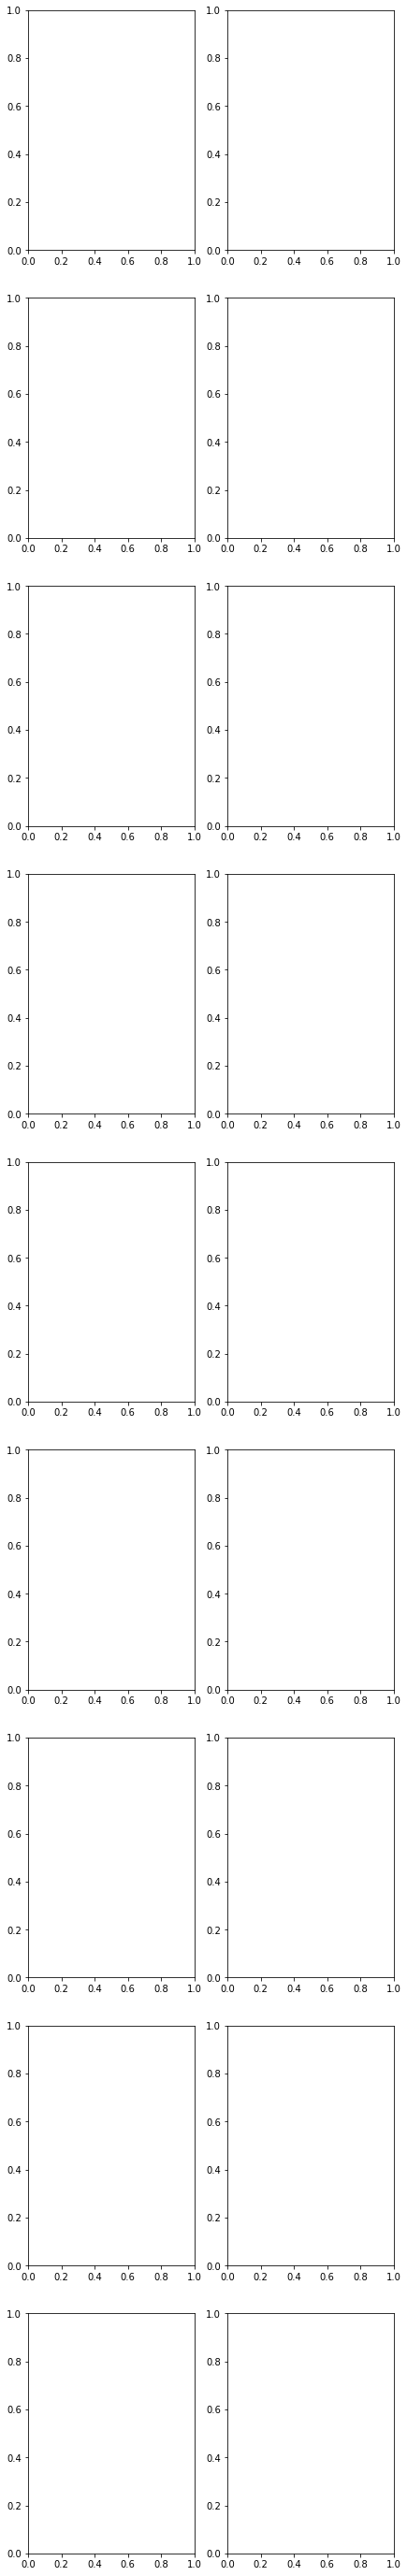

In [30]:
fig, ax = plt.subplots(9, 2, figsize=(7, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

In [37]:
data[columns[count]]

0       201410
1       201502
2       201502
3       201406
4       201501
         ...  
6550    201410
6551    201504
6552    201410
6553    201501
6554    201406
Name: date, Length: 21590, dtype: object

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

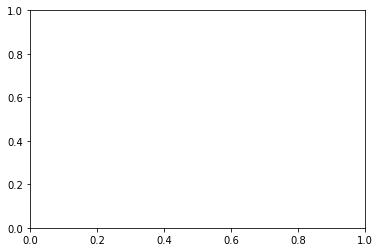

In [38]:
sns.kdeplot(data = data[columns[count]])

## 3.7. 일단 제출하고 시작해! Baseline 모델 (4) 모델 설계

## 3.8. 일단 제출하고 시작해! Baseline 모델 (5) 캐글에 첫 결과 제출하기

## 3.9. 랭킹을 올리고 싶다면? (1) 다시 한 번, 내 입맛대로 데이터 준비하기

## 3.10. 랭킹을 올리고 싶다면? (2) 다양한 실험을 위해 함수로 만들어 쓰자

## 3.11. 랭킹을 올리고 싶다면? (3) 하이퍼 파라미터 튜닝의 최강자, 그리드 탐색

## 3.12. 랭킹을 올리고 싶다면? (4) 제출하는 것도, 빠르고 깔끔하게!

## 3.13. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!

## 3.14. 프로젝트 제출